**Import Required Libraries**



In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load Titanic dataset
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Checking Data Information**

In [3]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# Drop rows with missing 'Embarked' values
df = df.dropna(subset=['Embarked'])

In [5]:
# Fill missing 'Age' values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-5-2ab58b3c9689>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-5-2ab58b3c9689>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(df['Age'].median(), inplace=True)


In [6]:
# Fill missing 'Cabin' values with 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)

<ipython-input-6-515faad497cd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('Unknown', inplace=True)
<ipython-input-6-515faad497cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cabin'].fillna('Unknown', inplace=True)


In [7]:
# Check if any missing values remain
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


**Analyzing and Visualizing Data**

In [8]:
# Summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Count of survivors (1 = survived, 0 = did not survive)
survival_counts = df['Survived'].value_counts()
print(survival_counts)

Survived
0    549
1    340
Name: count, dtype: int64


In [10]:
# Proportion of survivors by gender
survival_by_gender = df.groupby('Sex')['Survived'].mean()
print(survival_by_gender)

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64


In [11]:
df.shape

(889, 12)

**Visualization Data**



1.   Age Distribution of Passengers



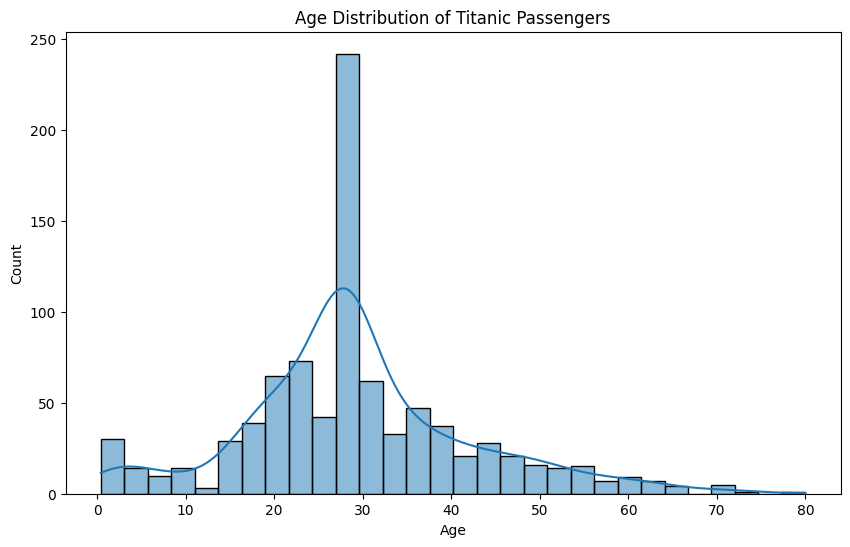

In [12]:
# Age distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



2.   Survival Rate by Passenger Class



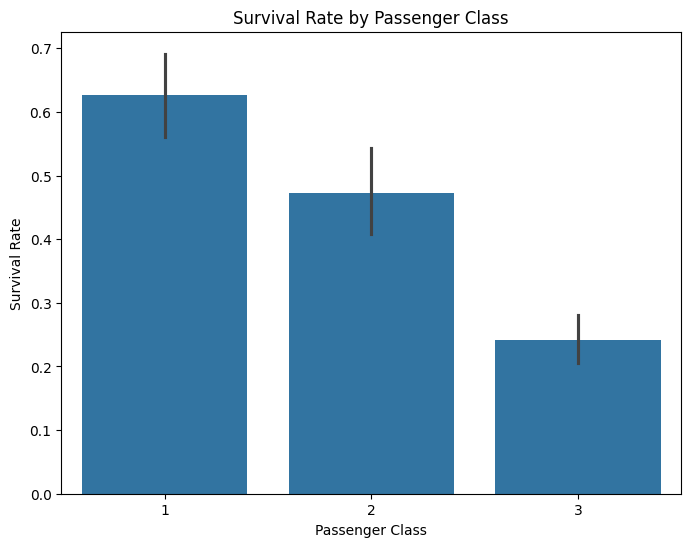

In [13]:
# Survival by Passenger Class
plt.figure(figsize=(8,6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


3. Survival Rate by Gender



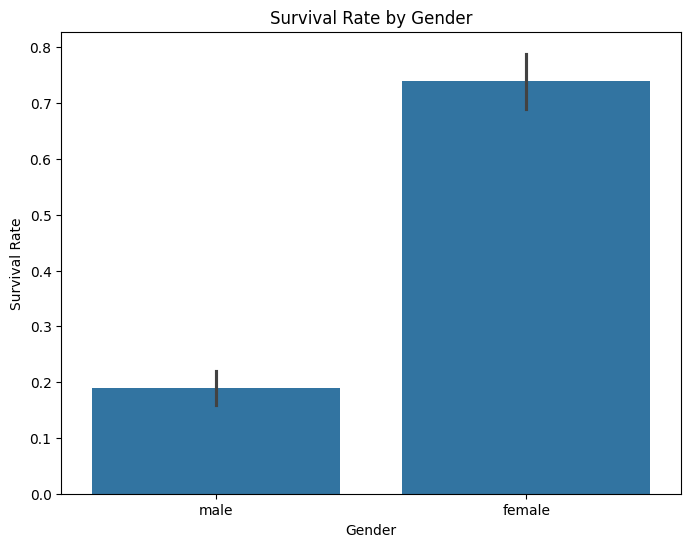

In [14]:
# Survival rate by gender
plt.figure(figsize=(8,6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()


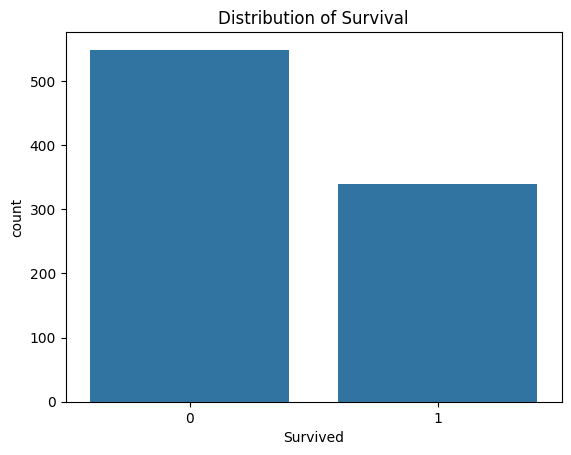

In [15]:
sns.countplot(x = 'Survived', data = df )
plt.title('Distribution of Survival')
plt.show()

**Model Prediction**

In [16]:
# Select features and target
X = df[['Pclass', 'Age', 'Sex']]
X['Sex'] = X['Sex'].apply(lambda x: 1 if x == 'male' else 0)  # Convert 'male' to 1, 'female' to 0
y = df['Survived']

<ipython-input-16-d19b0a64ee4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].apply(lambda x: 1 if x == 'male' else 0)  # Convert 'male' to 1, 'female' to 0


In [17]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



1.   Logistic Regression Model



In [18]:
# Initialize and fit the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [19]:
# Predict on test data
lr_y_pred = lr.predict(X_test)

In [20]:
# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, lr_y_pred):.2f}')

Accuracy: 0.79


In [21]:
print(f'confusion_matrix: \n{confusion_matrix(y_test, lr_y_pred)}')

confusion_matrix: 
[[87 22]
 [16 53]]


In [22]:
print(f'Classification Report :\n{classification_report(y_test, lr_y_pred)}')

Classification Report :
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       109
           1       0.71      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



2. Decision Tree Classifier

In [23]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
dtc_y_pred = dtc.predict(X_test)

In [25]:
# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, dtc_y_pred):.2f}')

Accuracy: 0.82


In [26]:
print(f'confusion_matrix: \n{confusion_matrix(y_test, dtc_y_pred)}')

confusion_matrix: 
[[99 10]
 [22 47]]


In [27]:
print(f'Classification Report :\n{classification_report(y_test, dtc_y_pred)}')

Classification Report :
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       109
           1       0.82      0.68      0.75        69

    accuracy                           0.82       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.82      0.82       178



3. Random Forest Classifier

In [28]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
rfc_y_pred = rfc.predict(X_test)

In [30]:
print(f'Accuracy: {accuracy_score(y_test, rfc_y_pred):.2f}')

Accuracy: 0.83


In [31]:
print(f'Confusion Matrix:\n{confusion_matrix(y_test, rfc_y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, rfc_y_pred)}')

Confusion Matrix:
[[98 11]
 [20 49]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       109
           1       0.82      0.71      0.76        69

    accuracy                           0.83       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.83      0.83      0.82       178



4. Naive Bayes

In [32]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [33]:
nb_y_pred = nb.predict(X_test)

In [38]:
print(f'Accuracy: {accuracy_score(y_test, nb_y_pred):.2f}')

Accuracy: 0.79


In [39]:
print(f'Confusion Matrix:\n{confusion_matrix(y_test, nb_y_pred)}')

Confusion Matrix:
[[87 22]
 [16 53]]


In [40]:
print(f'Classification Report:\n{classification_report(y_test, nb_y_pred)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       109
           1       0.71      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



In [41]:
accuracy_scores = {
    'Logistic Regression': accuracy_score(y_test, lr_y_pred),
    'Decision Tree': accuracy_score(y_test, dtc_y_pred),
    'Random Forest': accuracy_score(y_test, rfc_y_pred),
    'Naive Bayes': accuracy_score(y_test, nb_y_pred)
}

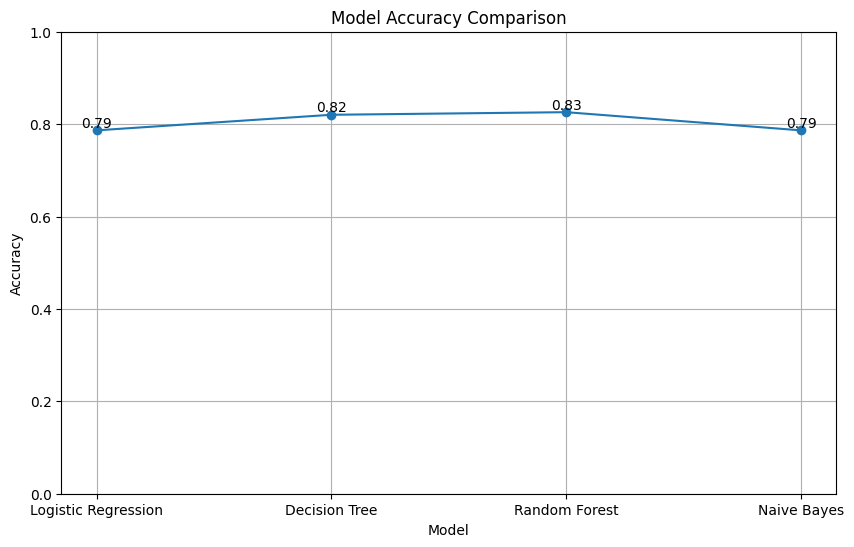

In [44]:
plt.figure(figsize=(10,6))
plt.plot(accuracy_scores.keys(), accuracy_scores.values(), marker='o')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)

for i, accuracy in enumerate(accuracy_scores.values()):
    plt.text(i, accuracy, f'{accuracy:.2f}', ha='center', va='bottom')

plt.show()

In [48]:
best_model = max(accuracy_scores, key=accuracy_scores.get)
print(f'The best model is: {best_model}')

The best model is: Random Forest
